In [ ]:
import pandas as pd
import numpy as np

print("Loading 2024 California reservation data...")

# Import 2024 California reservation data
df = pd.read_csv('data/reservations_2024_california_sample.csv', low_memory=False)

df.head()

Loading 2024 California reservation data...
✓ Data loaded successfully!
Total records: 1,118,192

Dataset shape: (1118192, 35)

Column names and types:
historicalreservationid     object
ordernumber                 object
agency                      object
orgid                        int64
codehierarchy               object
regioncode                  object
regiondescription           object
parentlocationid            object
parentlocation              object
legacyfacilityid           float64
park                        object
sitetype                    object
usetype                     object
productid                   object
inventorytype               object
facilityid                  object
facilityzip                float64
facilitystate               object
facilitylongitude          float64
facilitylatitude           float64
customerzip                 object
tax                        float64
usefee                     float64
tranfee                    float64
attrfee 

,historicalreservationid,ordernumber,agency,orgid,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,legacyfacilityid,...,totalbeforetax,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,equipmentlength
0,4310d764-fa09-44c6-9a27-c036411ec047,0600033190-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,10004620.0,...,11.0,0.0,11.0,2024-08-03T00:00:00Z,2024-08-04T00:00:00Z,2024-08-04T02:13:37.018512Z,1 day,2.0,NaN,0.0
1,c1a44f03-f929-439b-b5ca-dc5e8fd3b66f,0600171532-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,10004620.0,...,11.0,0.0,11.0,2024-07-20T00:00:00Z,2024-07-21T00:00:00Z,2024-07-21T00:52:53.016383Z,1 day,3.0,NaN,0.0
2,c5011bd3-2253-4638-a1cc-e495e7f81dfb,0600401208-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,10004620.0,...,22.0,0.0,22.0,2024-04-26T00:00:00Z,2024-04-28T00:00:00Z,2024-04-26T18:30:03.952466Z,2 days,2.0,NaN,0.0
3,33faed38-a708-46c6-b325-f214876df032,0601041781-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,10004620.0,...,11.0,0.0,11.0,2024-05-26T00:00:00Z,2024-05-27T00:00:00Z,2024-05-26T23:22:10.309984Z,1 day,2.0,NaN,0.0
4,97387cdb-865e-484c-880c-0e27eb932605,0601054577-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,10004620.0,...,11.0,0.0,11.0,2024-08-07T00:00:00Z,2024-08-08T00:00:00Z,2024-08-07T16:55:46.455658Z,1 day,2.0,NaN,0.0


In [ ]:
# Select only relevant columns
relevant_columns = [
    'startdate',      # Reservation start date
    'enddate',        # Reservation end date
    'orderdate',      # When the reservation was made
    'nights',         # Duration
    'park',           # Name of the park
    'facilitystate',  # State - All California for this dataset
    'sitetype',       # Type of campsite - RV, tent, etc.
    'usetype',        # Use type - day, camping, etc
    'numberofpeople', # Size of the group
    'facilityzip'     # Zipcode
]

# Keep only relevant columns
df_filtered = df[relevant_columns].copy()

print(f"\nColumns for analysis:")
print(df_filtered.columns.tolist())
print(f"\nShape: {df_filtered.shape}")
df_filtered.head()

Reduced from 35 columns to 10 columns

Remaining columns:
['startdate', 'enddate', 'orderdate', 'nights', 'park', 'facilitystate', 'sitetype', 'usetype', 'numberofpeople', 'facilityzip']

Shape: (1118192, 10)

First few rows:


,startdate,enddate,orderdate,nights,park,facilitystate,sitetype,usetype,numberofpeople,facilityzip
0,2024-08-03T00:00:00Z,2024-08-04T00:00:00Z,2024-08-04T02:13:37.018512Z,1 day,Tuttle Creek Campground,California,STANDARD NONELECTRIC,Overnight,2.0,93545.0
1,2024-07-20T00:00:00Z,2024-07-21T00:00:00Z,2024-07-21T00:52:53.016383Z,1 day,Tuttle Creek Campground,California,STANDARD NONELECTRIC,Overnight,3.0,93545.0
2,2024-04-26T00:00:00Z,2024-04-28T00:00:00Z,2024-04-26T18:30:03.952466Z,2 days,Tuttle Creek Campground,California,STANDARD NONELECTRIC,Overnight,2.0,93545.0
3,2024-05-26T00:00:00Z,2024-05-27T00:00:00Z,2024-05-26T23:22:10.309984Z,1 day,Tuttle Creek Campground,California,STANDARD NONELECTRIC,Overnight,2.0,93545.0
4,2024-08-07T00:00:00Z,2024-08-08T00:00:00Z,2024-08-07T16:55:46.455658Z,1 day,Tuttle Creek Campground,California,MANAGEMENT,Overnight,2.0,93545.0


In [ ]:
# Check for missing values in filtered data
print("Missing values per column:")
print(df_filtered.isnull().sum())
print(f"\nMissing value percentage:")
print((df_filtered.isnull().sum() / len(df_filtered) * 100).round(2))

# Check for duplicates
print(f"\nDuplicate rows: {df_filtered.duplicated().sum()}")

Missing values per column:
startdate              0
enddate           171247
orderdate              0
nights            158977
park                   0
facilitystate          0
sitetype          196223
usetype           317549
numberofpeople    176819
facilityzip            0
dtype: int64

Missing value percentage:
startdate          0.00
enddate           15.31
orderdate          0.00
nights            14.22
park               0.00
facilitystate      0.00
sitetype          17.55
usetype           28.40
numberofpeople    15.81
facilityzip        0.00
dtype: float64

Duplicate rows: 32222


In [ ]:
# Copy the dataframe for sanitization
df_clean = df_filtered.copy()

# Remove duplicate rows if any
df_clean = df_clean.drop_duplicates()

# Convert date columns to datetime
df_clean['startdate'] = pd.to_datetime(df_clean['startdate'], errors='coerce')
df_clean['enddate'] = pd.to_datetime(df_clean['enddate'], errors='coerce')
df_clean['orderdate'] = pd.to_datetime(df_clean['orderdate'], errors='coerce')

# Calculate lead time (days between booking and arrival)
df_clean['lead_time_days'] = (df_clean['startdate'] - df_clean['orderdate']).dt.days

# Extract time basedd features
df_clean['booking_month'] = df_clean['orderdate'].dt.month
df_clean['booking_day_of_week'] = df_clean['orderdate'].dt.dayofweek
df_clean['arrival_month'] = df_clean['startdate'].dt.month
df_clean['arrival_day_of_week'] = df_clean['startdate'].dt.dayofweek
df_clean['arrival_quarter'] = df_clean['startdate'].dt.quarter

# Remove rows with missing dates since this is critical for analysis
df_clean = df_clean.dropna(subset=['startdate', 'enddate', 'orderdate'])

# Remove negative lead times
df_clean = df_clean[df_clean['lead_time_days'] >= 0]

# Remove whitespace
string_columns = df_clean.select_dtypes(include=['object']).columns
for col in string_columns:
    df_clean[col] = df_clean[col].str.strip()

print(f"Original data: {len(df_filtered)} rows")
print(f"Sanitized data: {len(df_clean)} rows")
print(f"Total removed: {len(df_filtered) - len(df_clean)} rows ({((len(df_filtered) - len(df_clean)) / len(df_filtered) * 100):.2f}%)")
print(f"\nCleaned data :")
df_clean.info()

Original dataset: 1118192 rows
Cleaned dataset: 847570 rows
Removed: 270622 rows (24.20%)

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
Index: 847570 entries, 211 to 1098179
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   startdate            847570 non-null  datetime64[ns, UTC]
 1   enddate              847570 non-null  datetime64[ns, UTC]
 2   orderdate            847570 non-null  datetime64[ns, UTC]
 3   nights               847570 non-null  object             
 4   park                 847570 non-null  object             
 5   facilitystate        847570 non-null  object             
 6   sitetype             825266 non-null  object             
 7   usetype              704483 non-null  object             
 8   numberofpeople       844739 non-null  float64            
 9   facilityzip          847570 non-null  float64            
 10  lead_time_days      

In [ ]:
# Display summary statistics of the cleaned data
print("Summary statistics:")
df_clean.describe(include='all')

Summary statistics:


,startdate,enddate,orderdate,nights,park,facilitystate,sitetype,usetype,numberofpeople,facilityzip,lead_time_days,booking_month,booking_day_of_week,arrival_month,arrival_day_of_week,arrival_quarter
count,847570,847570,847570,847570,847570,847570,825266,704483,844739.000000,847570.000000,847570.000000,847570.000000,847570.000000,847570.000000,847570.000000,847570.000000
unique,NaN,NaN,NaN,47,516,1,40,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,1 day,Upper Pines Campground,California,STANDARD NONELECTRIC,Overnight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,294701,44781,847570,469746,703164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2024-06-02 01:11:34.974102784+00:00,2024-06-04 09:04:06.308858880+00:00,2024-03-27 17:56:12.253193984+00:00,NaN,NaN,NaN,NaN,NaN,3.921974,75164.148490,65.864429,5.691116,2.855161,7.012731,3.371653,2.665729
min,2023-10-01 00:00:00+00:00,2023-10-01 00:00:00+00:00,2020-10-01 15:14:03.963000+00:00,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,2024-05-03 00:00:00+00:00,2024-05-05 00:00:00+00:00,2024-01-19 05:12:58.937361920+00:00,NaN,NaN,NaN,NaN,NaN,2.000000,92225.000000,7.000000,3.000000,1.000000,6.000000,2.000000,2.000000
50%,2024-06-30 00:00:00+00:00,2024-07-02 00:00:00+00:00,2024-04-13 19:23:27.833466112+00:00,NaN,NaN,NaN,NaN,NaN,3.000000,93526.000000,36.000000,6.000000,3.000000,7.000000,4.000000,3.000000
75%,2024-08-09 00:00:00+00:00,2024-08-11 00:00:00+00:00,2024-06-24 08:43:11.826551552+00:00,NaN,NaN,NaN,NaN,NaN,5.000000,95389.000000,126.000000,8.000000,5.000000,8.000000,5.000000,3.000000
max,2024-09-30 00:00:00+00:00,2024-11-04 00:00:00+00:00,2024-09-29 23:53:58.602627+00:00,NaN,NaN,NaN,NaN,NaN,160.000000,108260.000000,1095.000000,12.000000,6.000000,12.000000,6.000000,4.000000


# Data Visualization

Let's explore the booking patterns and lead times through visualizations.

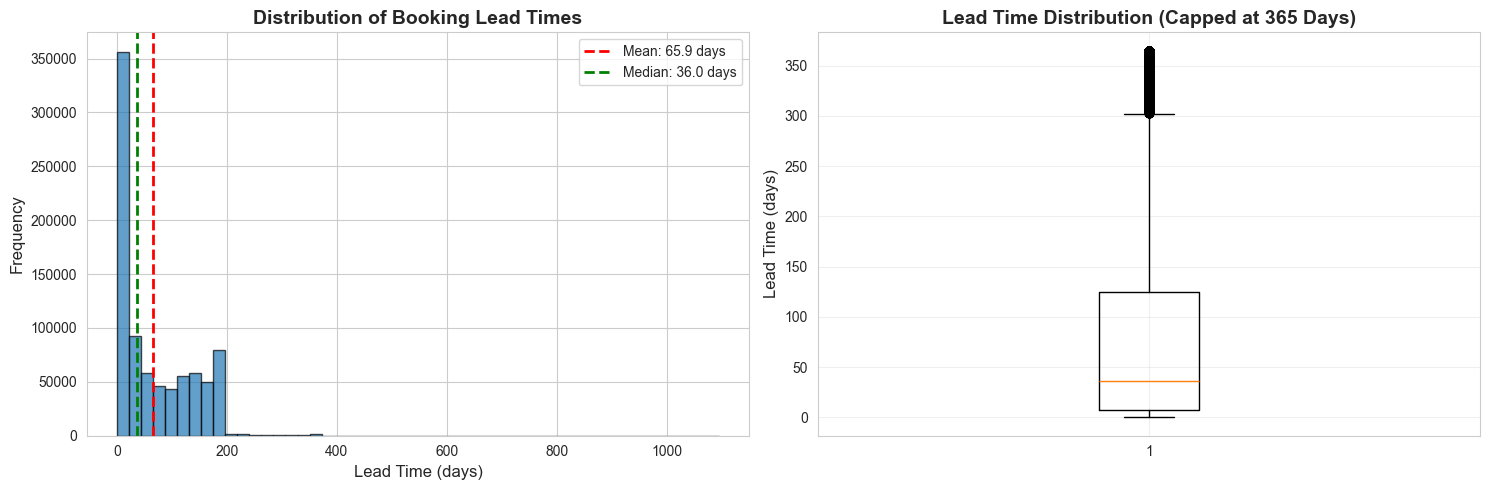

Lead Time Quartiles:
count    847570.000000
mean         65.864429
std          67.123126
min           0.000000
25%           7.000000
50%          36.000000
75%         126.000000
max        1095.000000
Name: lead_time_days, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 6)

# 1. Lead Time Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hist of lead times
axes[0].hist(df_clean['lead_time_days'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Lead Time (days)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Booking Lead Times', fontsize=14, fontweight='bold')
axes[0].axvline(df_clean['lead_time_days'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["lead_time_days"].mean():.1f} days')
axes[0].axvline(df_clean['lead_time_days'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["lead_time_days"].median():.1f} days')
axes[0].legend()

# Box plot of lead times - max 1 year
lead_time_capped = df_clean[df_clean['lead_time_days'] <= 365]['lead_time_days']
axes[1].boxplot(lead_time_capped, vert=True)
axes[1].set_ylabel('Lead Time (days)', fontsize=12)
axes[1].set_title('Lead Time Distribution (Capped at 365 Days)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Lead Time:")
print(df_clean['lead_time_days'].describe())

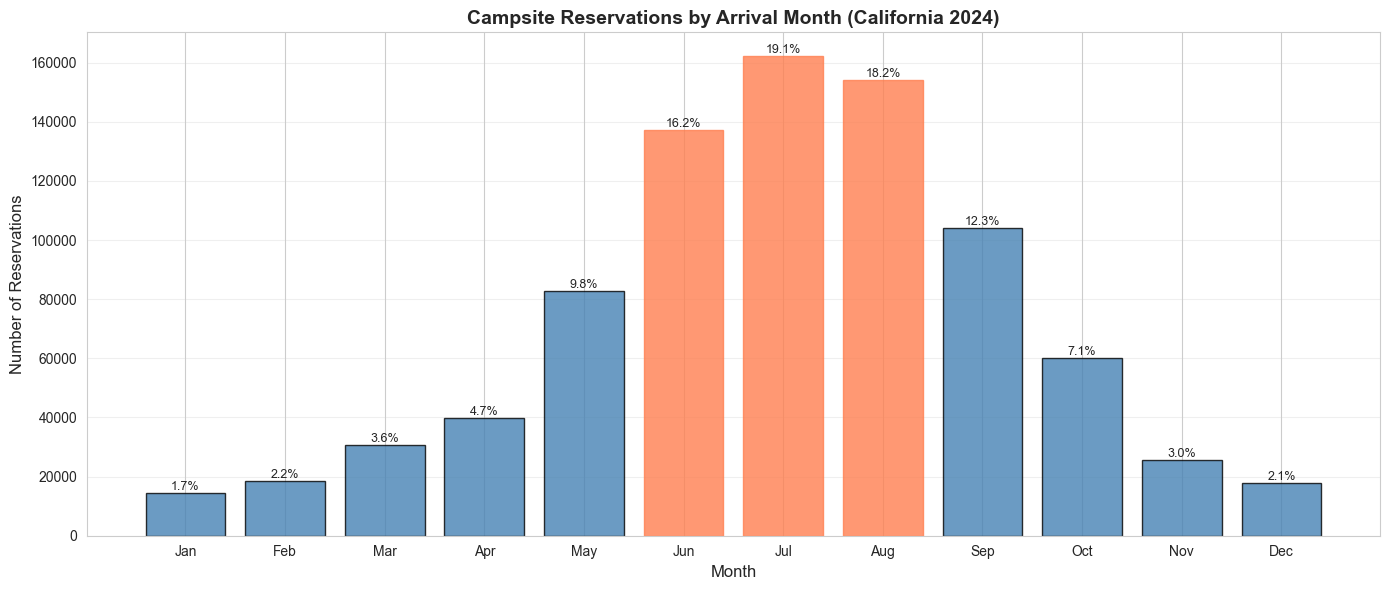


Top 5 months for camping:
arrival_month
7.0    162154
8.0    154283
6.0    137258
9.0    104132
5.0     82815
Name: count, dtype: int64


In [ ]:
# 2. Reservations by Arrival Month
fig, ax = plt.subplots(figsize=(14, 6))

arrival_by_month = df_clean['arrival_month'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bars = ax.bar(range(1, 13), [arrival_by_month.get(i, 0) for i in range(1, 13)], 
               color='steelblue', edgecolor='black', alpha=0.8)

# Highlight peak months
peak_months = [6, 7, 8]
for i in peak_months:
    bars[i-1].set_color('coral')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Reservations', fontsize=12)
ax.set_title('Campsite Reservations by Arrival Month (California 2024)', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.grid(True, axis='y', alpha=0.3)

# Add percentage labels on bars
total_reservations = arrival_by_month.sum()
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_reservations) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTop 5 months for camping:")
print(arrival_by_month.sort_values(ascending=False).head())

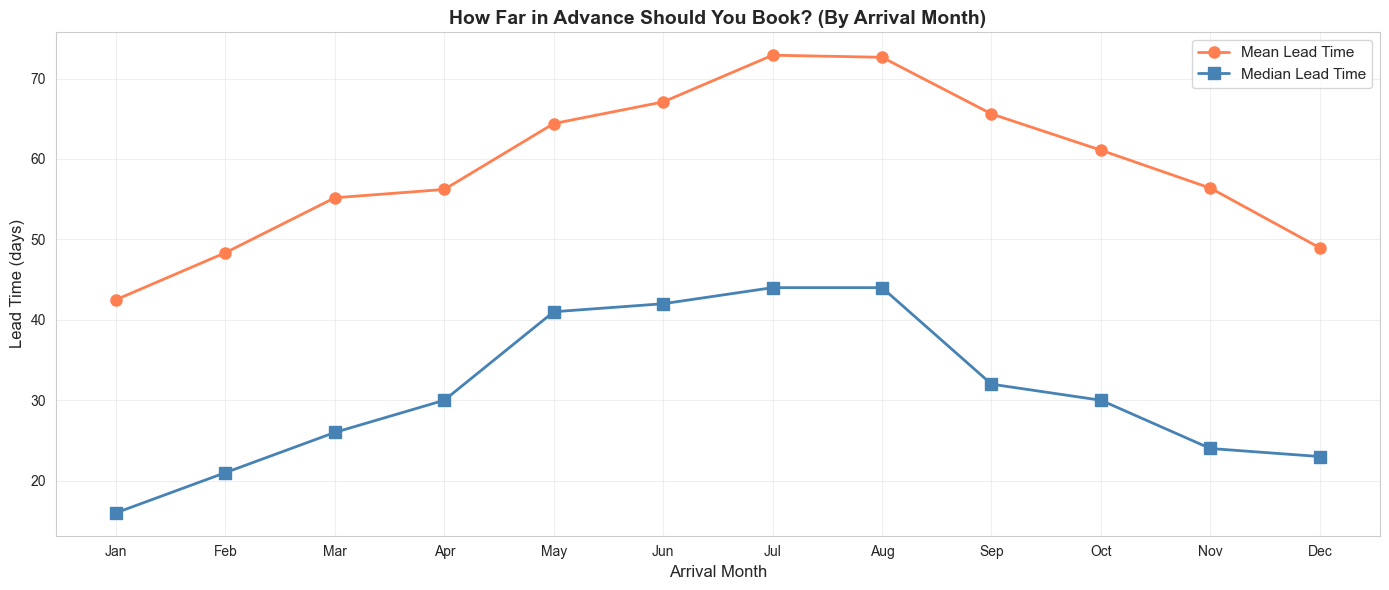


Average Lead Time by Arrival Month:
    arrival_month       mean  median
0             1.0  42.500413    16.0
1             2.0  48.345268    21.0
2             3.0  55.176153    26.0
3             4.0  56.210471    30.0
4             5.0  64.400060    41.0
5             6.0  67.091215    42.0
6             7.0  72.897955    44.0
7             8.0  72.640732    44.0
8             9.0  65.598231    32.0
9            10.0  61.089339    30.0
10           11.0  56.377775    24.0
11           12.0  48.948075    23.0


In [ ]:
# 3. Lead Time by Arrival Month - When to Book for Each Month
fig, ax = plt.subplots(figsize=(14, 6))

# Calculate average lead time by arrival month
lead_time_by_month = df_clean.groupby('arrival_month')['lead_time_days'].agg(['mean', 'median']).reset_index()

x = range(1, 13)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot mean and median
ax.plot(x, [lead_time_by_month[lead_time_by_month['arrival_month']==i]['mean'].values[0] if i in lead_time_by_month['arrival_month'].values else 0 for i in x], 
        marker='o', linewidth=2, markersize=8, label='Mean Lead Time', color='coral')
ax.plot(x, [lead_time_by_month[lead_time_by_month['arrival_month']==i]['median'].values[0] if i in lead_time_by_month['arrival_month'].values else 0 for i in x], 
        marker='s', linewidth=2, markersize=8, label='Median Lead Time', color='steelblue')

ax.set_xlabel('Arrival Month', fontsize=12)
ax.set_ylabel('Lead Time (days)', fontsize=12)
ax.set_title('How Far in Advance Should You Book? (By Arrival Month)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAverage Lead Time by Arrival Month:")
print(lead_time_by_month)

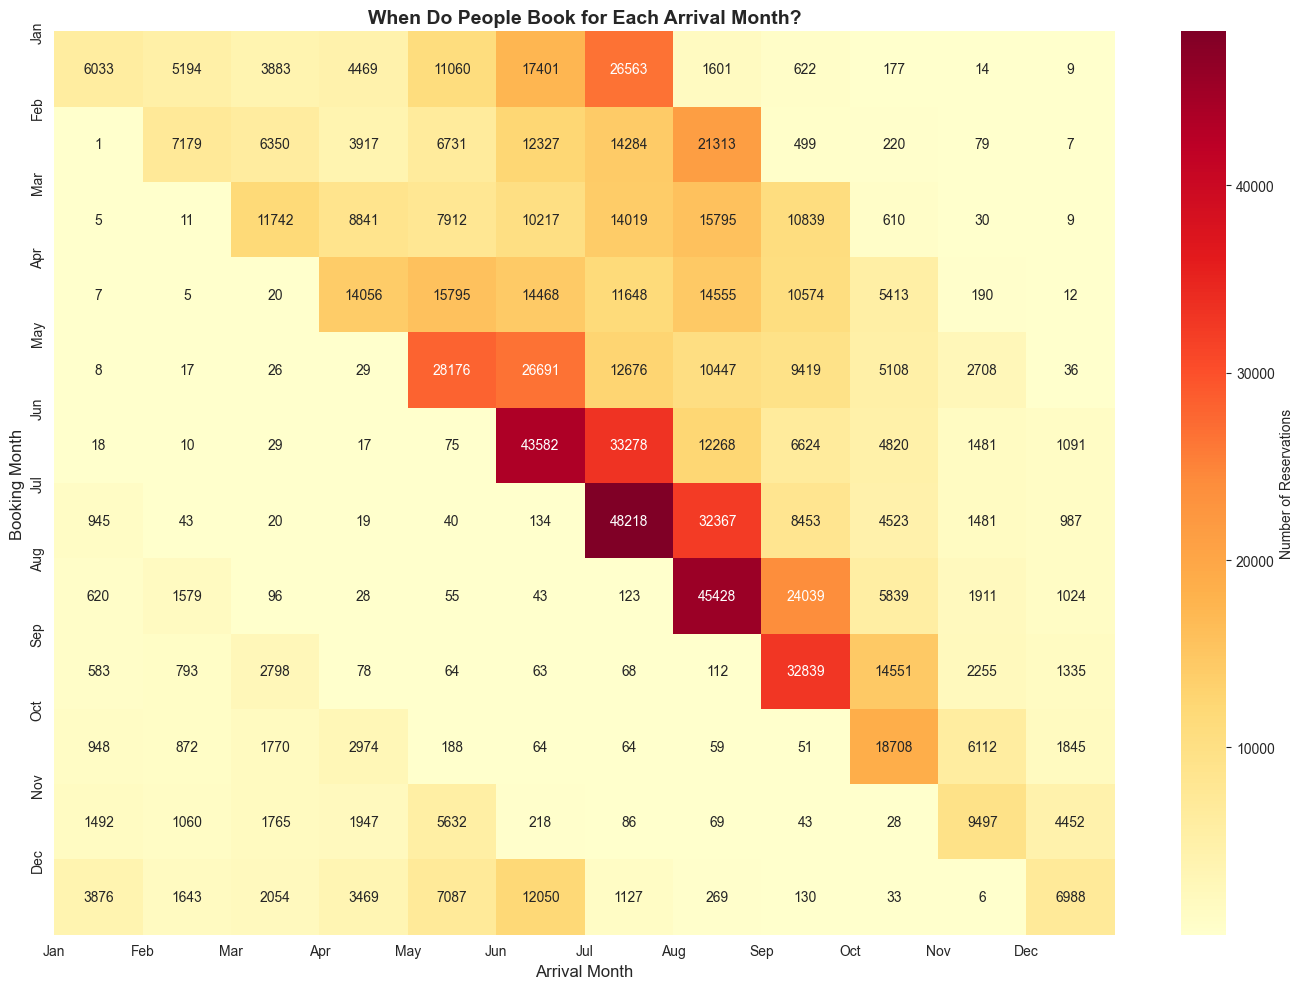

This heatmap shows when people make bookings (Y-axis) for different arrival months (X-axis)


In [ ]:
# 4. Heatmap: Booking Month vs Arrival Month
booking_arrival_matrix = pd.crosstab(df_clean['booking_month'], df_clean['arrival_month'])

plt.figure(figsize=(14, 10))
sns.heatmap(booking_arrival_matrix, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Reservations'})
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Booking Month', fontsize=12)
plt.title('When Do People Book for Each Arrival Month?', fontsize=14, fontweight='bold')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

print("This heatmap shows when people make bookings (Y-axis) for different arrival months (X-axis)")

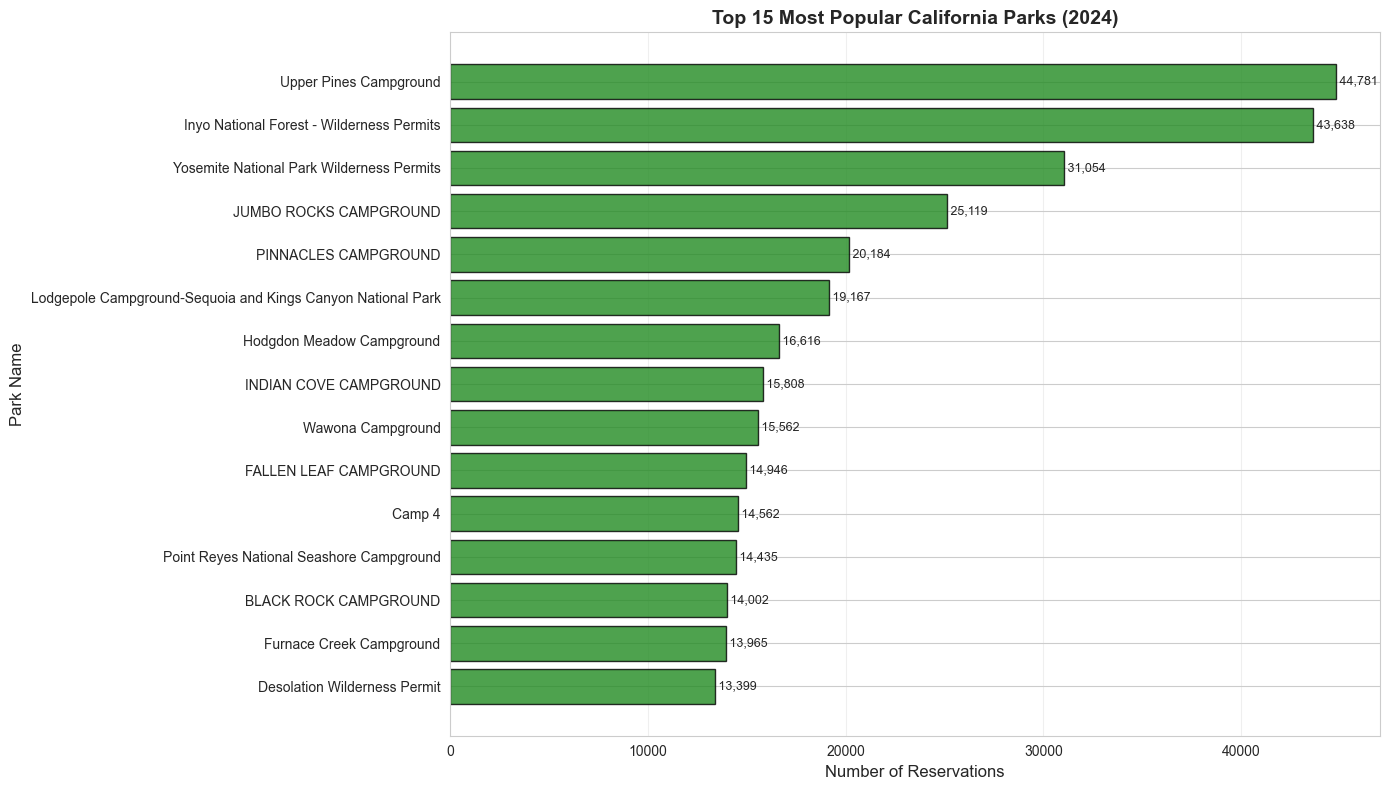


Total unique parks in dataset: 516


In [ ]:
# 5. Top 15 Most Popular Parks
top_parks = df_clean['park'].value_counts().head(15)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(top_parks)), top_parks.values, color='forestgreen', edgecolor='black', alpha=0.8)
plt.yticks(range(len(top_parks)), top_parks.index)
plt.xlabel('Number of Reservations', fontsize=12)
plt.ylabel('Park Name', fontsize=12)
plt.title('Top 15 Most Popular California Parks (2024)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_parks.values)):
    plt.text(value, i, f' {value:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nTotal unique parks in dataset: {df_clean['park'].nunique()}")

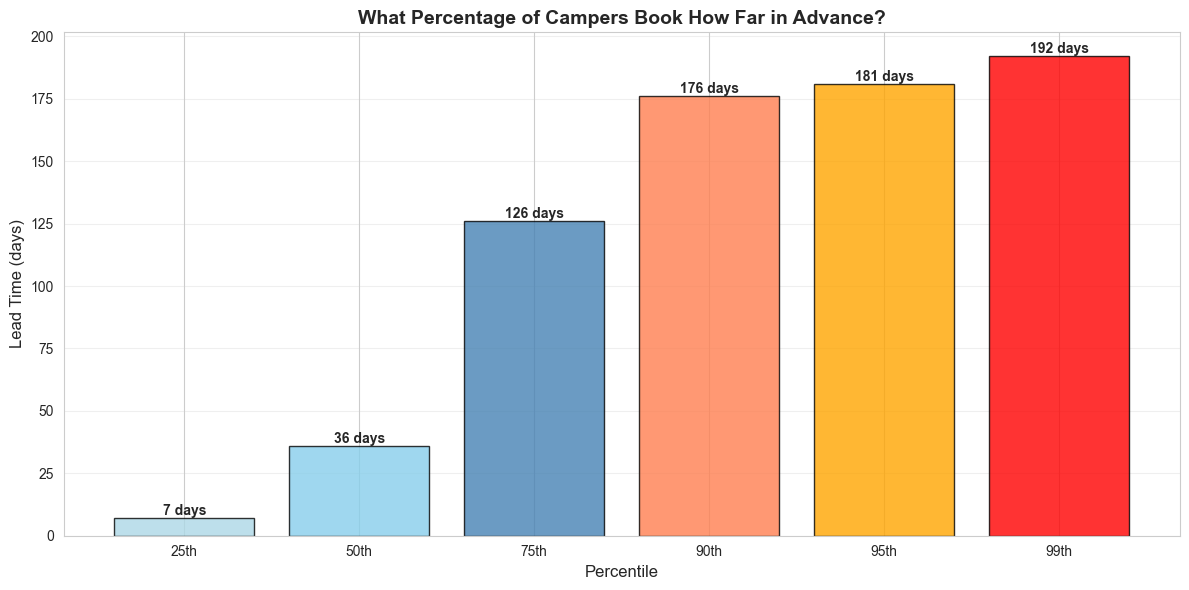


Key Insights:
• 25% of campers book within 7 days
• 50% of campers book within 36 days
• 75% of campers book within 126 days
• 90% of campers book within 176 days
• 95% of campers book within 181 days


In [ ]:
# 6. Lead Time Distribution by Percentiles
percentiles = [25, 50, 75, 90, 95, 99]
lead_time_percentiles = [df_clean['lead_time_days'].quantile(p/100) for p in percentiles]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(percentiles)), lead_time_percentiles, 
               color=['lightblue', 'skyblue', 'steelblue', 'coral', 'orange', 'red'],
               edgecolor='black', alpha=0.8)

plt.xlabel('Percentile', fontsize=12)
plt.ylabel('Lead Time (days)', fontsize=12)
plt.title('What Percentage of Campers Book How Far in Advance?', fontsize=14, fontweight='bold')
plt.xticks(range(len(percentiles)), [f'{p}th' for p in percentiles])
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, lead_time_percentiles)):
    plt.text(i, value, f'{value:.0f} days', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"• 25% of campers book within {lead_time_percentiles[0]:.0f} days")
print(f"• 50% of campers book within {lead_time_percentiles[1]:.0f} days")
print(f"• 75% of campers book within {lead_time_percentiles[2]:.0f} days")
print(f"• 90% of campers book within {lead_time_percentiles[3]:.0f} days")
print(f"• 95% of campers book within {lead_time_percentiles[4]:.0f} days")